In [13]:
import os
import numpy as np
import torch
import json
import matplotlib.pyplot as plt

In [18]:
# initialise arguments
concept = 'Van Gogh'
file_name = '../modularity/datasets/things.txt'
objects = open(file_name, 'r').read().split('\n')
dof = len(objects) - 1
tests = 'wanda'
test_name = f'skilled_neuron_%s'
ratio = ""
extensions = ['json', 'pt']
seed = 0
root = f'../results/results_seed_{seed}/stable-diffusion/baseline/runwayml/stable-diffusion-v1-5/modularity/{concept}/{test_name % tests}/{ratio}'
timesteps = 51
n_layers = 16
# conf_int = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
conf_int = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1]

In [19]:
def convert_dict_vals_to_list(d):
    vals = []
    for key in d:
        vals.append(d[key])
    return vals

# Plotting args
bar_width = 0.25
space = 0.0
if concept in ['Van Gogh', 'Monet', 'manga']:
    labels = ['photo', concept, 'w/o skilled neurons']
    axes_label = f'Concept removal (similarity to photo)'
elif concept in ['naked']:
    labels = ['not naked', 'naked', 'w/o skilled neurons']
    axes_label = f'Concept removal (similarity to not naked)'
elif concept in ['bloody red']:
    labels = ['alive', 'bloody red', 'w/o skilled neurons']
    axes_label = f'Concept removal (similarity to peaceful)'
elif concept in ['gender']:
    labels = ['woman', 'man', 'w/o skilled neurons']
    axes_label = f'Concept removal (similarity to woman)'
elif concept in ['scene_removal_cat']:
    labels = ['no cat', 'cat', 'w/o skilled neurons']
    axes_label = f'Concept removal (similarity to no cat)'

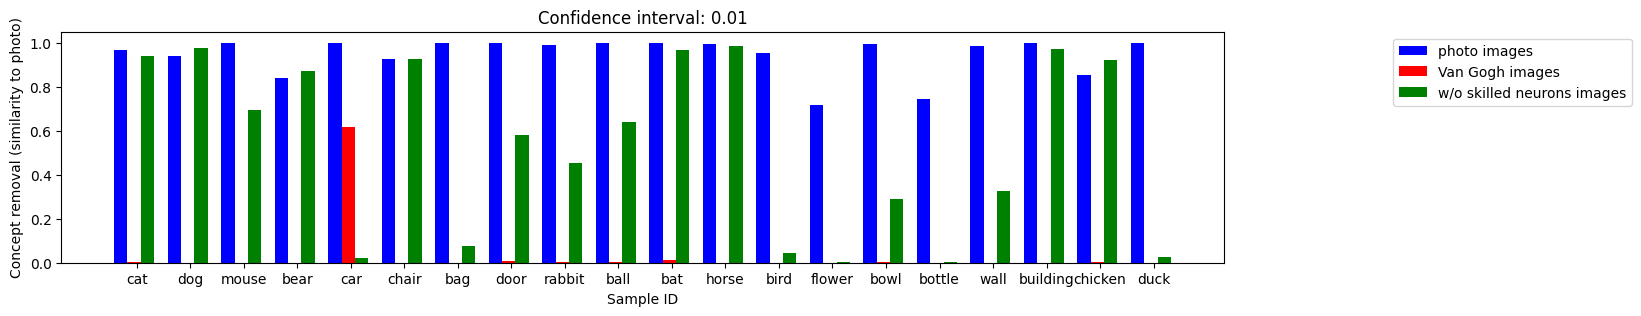

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_seed_0/stable-diffusion/baseline/runwayml/stable-diffusion-v1-5/modularity/Van Gogh/skilled_neuron_wanda/dof_19_conf_0.01/remove_neurons/clip_iqa_scores.png'

<Figure size 640x480 with 0 Axes>

In [21]:
# read clip iqa scores json file for every confidence interval
scores = {}
for conf in conf_int:
    if tests == 't_test':
        f_name = os.path.join(root, f'dof_{dof}_conf_{conf}', 'remove_neurons', f'clip_iqa_scores.json')
    elif tests == 'wanda':
        f_name = os.path.join(root, f'{conf}', 'remove_neurons', f'clip_iqa_scores.json')
    with open(f_name, 'r') as f:
        clip_iqa_scores = json.load(f)
    scores[conf] = clip_iqa_scores

    fig = plt.figure(figsize=(15, 3))
    # plot the clip iqa scores for random 5 sam
    plt.bar(np.arange(dof + 1) , convert_dict_vals_to_list(clip_iqa_scores['base']['concept_sim']), color='blue', width = bar_width, label=labels[0] + " images")
    plt.bar(np.arange(dof + 1) + bar_width, convert_dict_vals_to_list(clip_iqa_scores['concept']['concept_sim']), color='red', width = bar_width, label=labels[1] + " images")
    plt.bar(np.arange(dof + 1) + bar_width*2, convert_dict_vals_to_list(clip_iqa_scores['concept_removal']['concept_sim']), color='green', width = bar_width, label=labels[2] + " images")
    plt.title(f'Confidence interval: {conf}')
    plt.xlabel('Sample ID')
    plt.xticks(np.arange(dof + 1) + 0.3, objects)
    plt.ylabel(axes_label)

    plt.legend(bbox_to_anchor =(1.14, 1.0))
    # plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(root, f'dof_{dof}_conf_{conf}' if tests =='t_test' else "", 'remove_neurons', f'clip_iqa_scores.png'))


In [12]:
# average similarity score for each confidence interval

for conf in conf_int:
    values = scores[conf]['concept_removal']['concept_sim'].values()
    mean = np.mean(list(values))
    std = np.std(list(values))
    print(f'Confidence interval: {conf}, mean: {mean}, std: {std}')

Confidence interval: 0.001, mean: 0.8996456503868103, std: 0.15835507708025762
Confidence interval: 0.01, mean: 0.9189825773239135, std: 0.15689527943862197
Confidence interval: 0.02, mean: 0.9104692593216897, std: 0.17885729987068683
Confidence interval: 0.05, mean: 0.9159806579351425, std: 0.12969544011240944
Confidence interval: 0.1, mean: 0.9353260695934296, std: 0.09943893385784637
Confidence interval: 0.2, mean: 0.9395204454660415, std: 0.09304462349555574


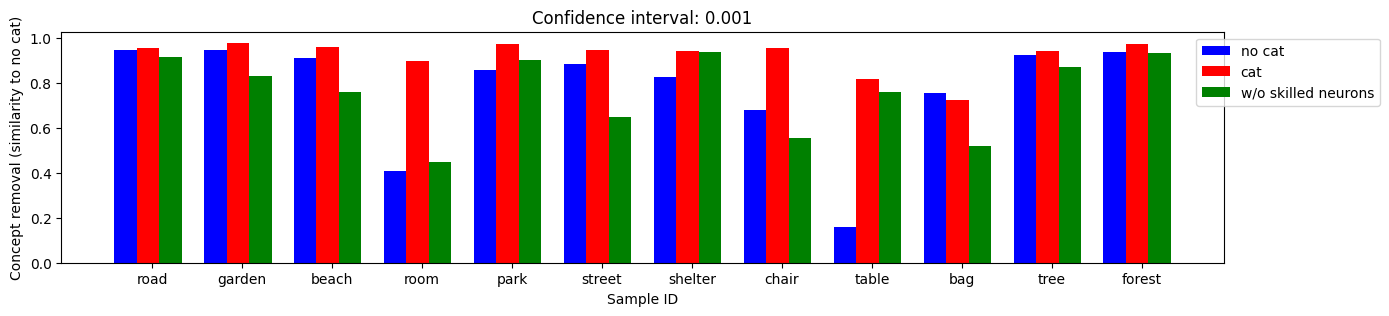

<Figure size 640x480 with 0 Axes>

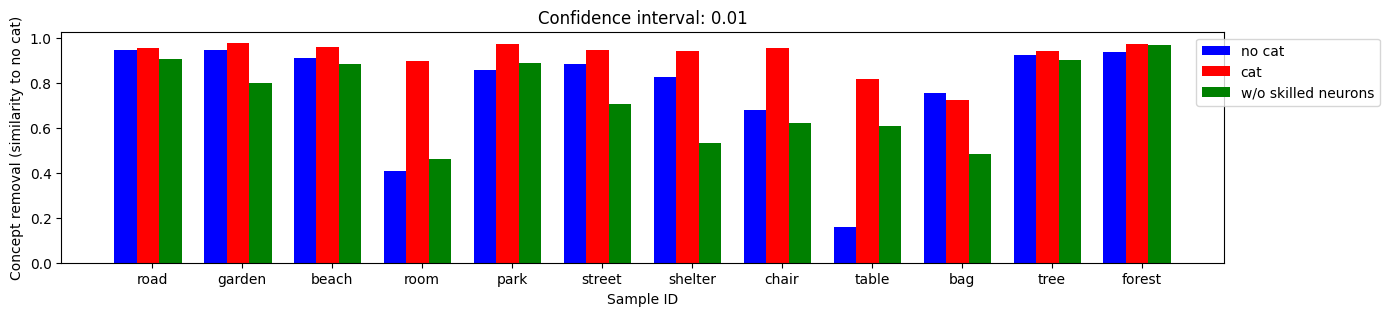

<Figure size 640x480 with 0 Axes>

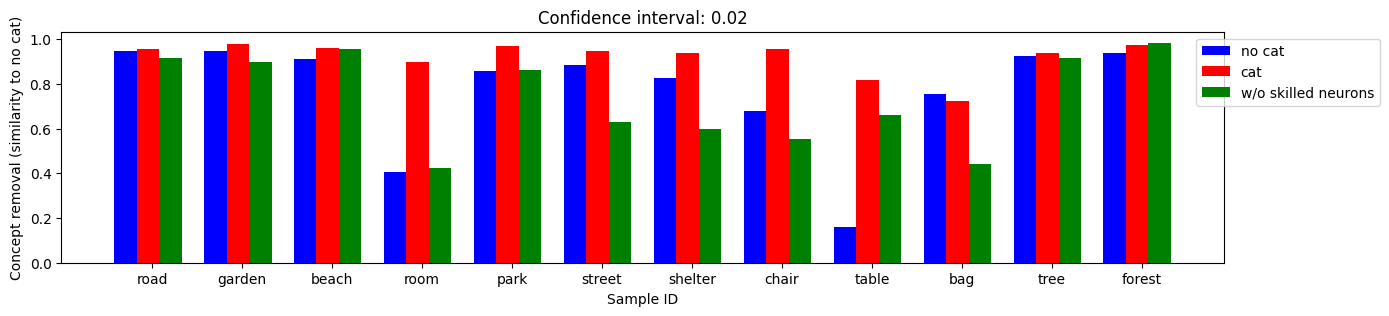

<Figure size 640x480 with 0 Axes>

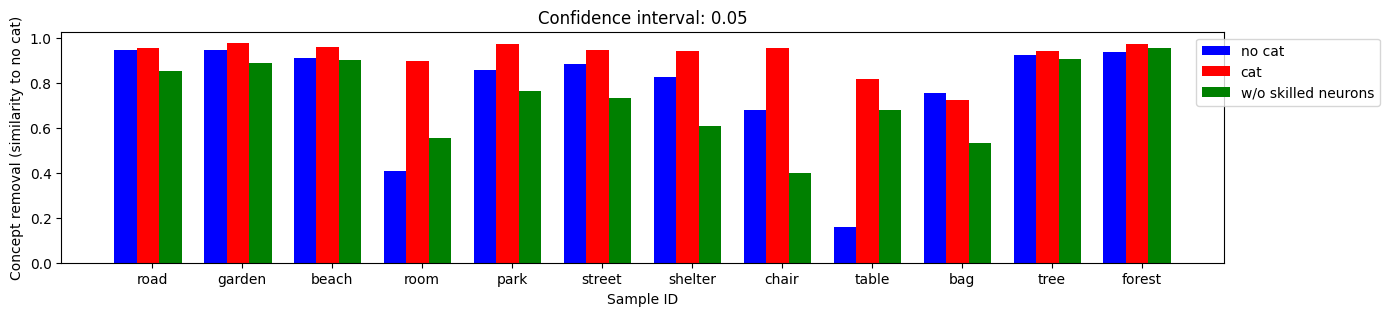

<Figure size 640x480 with 0 Axes>

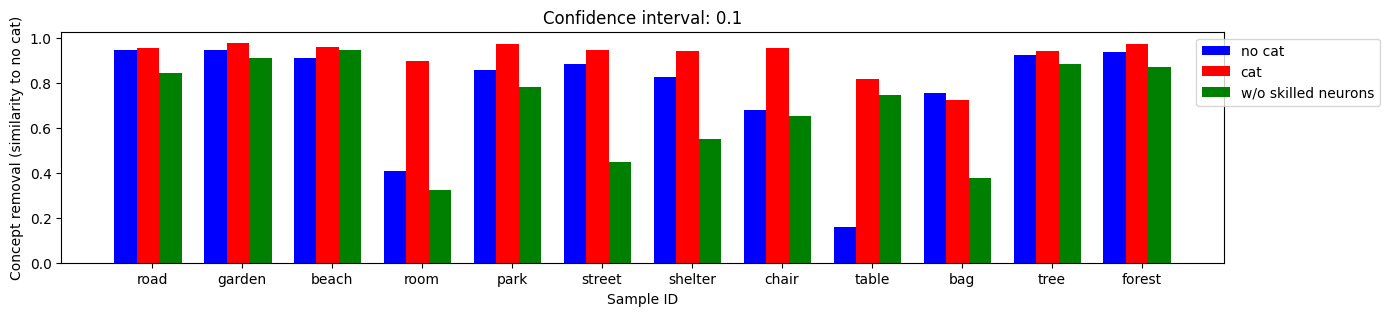

<Figure size 640x480 with 0 Axes>

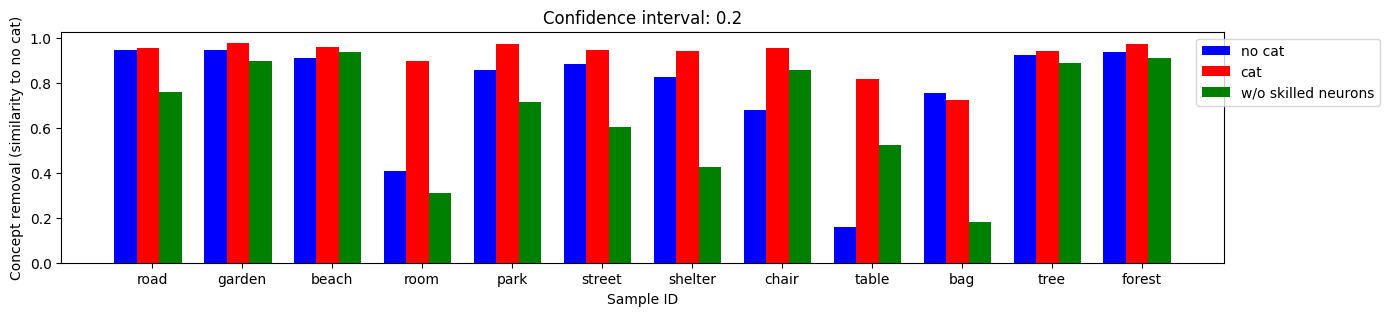

<Figure size 640x480 with 0 Axes>

In [59]:
# read clip iqa scores json file for every confidence interval
for conf in conf_int:
    clip_iqa_scores = scores[conf]
    fig = plt.figure(figsize=(15, 3))
    plt.bar(np.arange(dof + 1) , convert_dict_vals_to_list(clip_iqa_scores['base']['quality']), color='blue', width = bar_width, label=labels[0])
    plt.bar(np.arange(dof + 1) + bar_width, convert_dict_vals_to_list(clip_iqa_scores['concept']['quality']), color='red', width = bar_width, label=labels[1])
    plt.bar(np.arange(dof + 1) + bar_width*2, convert_dict_vals_to_list(clip_iqa_scores['concept_removal']['quality']), color='green', width = bar_width, label=labels[2])
    plt.title(f'Confidence interval: {conf}')
    plt.xlabel('Sample ID')
    plt.xticks(np.arange(dof + 1) + 0.3, objects)
    plt.ylabel(axes_label)

    plt.legend(bbox_to_anchor =(1.14, 1.0))
    # plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(root, f'dof_{dof}_conf_{conf}', 'remove_neurons', f'clip_iqa_scores_quality.png'))


{0.001: {'base': {'quality': {'0': 0.9473950266838074, '1': 0.9482792615890503, '2': 0.9124206304550171, '3': 0.4075859785079956, '4': 0.8564044237136841, '5': 0.8846592307090759, '6': 0.8252712488174438, '7': 0.6779029369354248, '8': 0.16121162474155426, '9': 0.7534477114677429, '10': 0.9234281778335571, '11': 0.9371444582939148}, 'concept_sim': {'0': 0.9735614061355591, '1': 0.9730511903762817, '2': 0.998953104019165, '3': 0.6789076924324036, '4': 0.9960177540779114, '5': 0.8263617753982544, '6': 0.9831390976905823, '7': 0.9707175493240356, '8': 0.12899371981620789, '9': 0.3336891531944275, '10': 0.9050507545471191, '11': 0.9910759925842285}}, 'concept': {'quality': {'0': 0.9576654434204102, '1': 0.9794166088104248, '2': 0.9616218209266663, '3': 0.8982141613960266, '4': 0.9717124700546265, '5': 0.9484248161315918, '6': 0.9403465986251831, '7': 0.9555394053459167, '8': 0.8187577724456787, '9': 0.7243034839630127, '10': 0.9407350420951843, '11': 0.9741126298904419}, 'concept_sim': {'0'

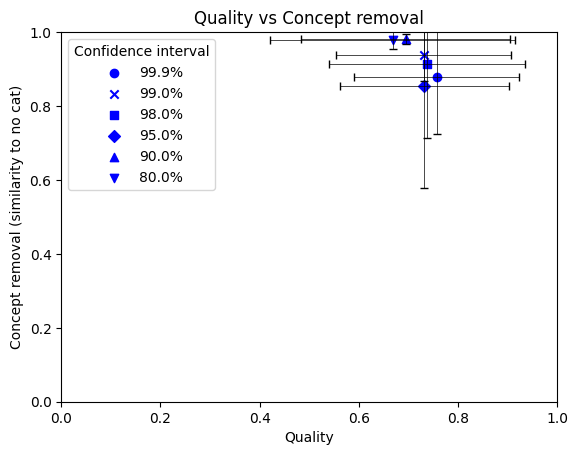

In [60]:
# Plot average and std of quality score and similarity in a single plot
# Every point corresponds to a confidence interval 
# X - axis is quality and y -axis is similarity
# Plot the point and standard deviation for each confidence interval
# fig = plt.figure(figsize=(15, 3))
print(scores)
markers = ['o', 'x', 's', 'D', '^', 'v']
quality, quality_std = [], []
sim, sim_std= [], []
for conf in conf_int:
    # quality = np.mean(convert_dict_vals_to_list(scores[conf]['base']['quality']))
    # similarity = np.mean(convert_dict_vals_to_list(scores[conf]['base']['concept_sim']))
    # plt.scatter(quality, similarity, color='blue')
    # plt.errorbar(quality, similarity, xerr=np.std(convert_dict_vals_to_list(scores[conf]['base']['quality'])), yerr=np.std(convert_dict_vals_to_list(scores[conf]['base']['concept_sim'])), fmt='o', color='blue')

    # quality = np.mean(convert_dict_vals_to_list(scores[conf]['concept']['quality']))
    # similarity = np.mean(convert_dict_vals_to_list(scores[conf]['concept']['concept_sim']))
    # plt.scatter(quality, similarity, color='red')
    # plt.errorbar(quality, similarity, xerr=np.std(convert_dict_vals_to_list(scores[conf]['concept']['quality'])), yerr=np.std(convert_dict_vals_to_list(scores[conf]['concept']['concept_sim'])), fmt='o', color='red')

    q = np.mean(convert_dict_vals_to_list(scores[conf]['concept_removal']['quality']))
    s = np.mean(convert_dict_vals_to_list(scores[conf]['concept_removal']['concept_sim']))
    q_std = np.std(convert_dict_vals_to_list(scores[conf]['concept_removal']['quality']))
    s_std = np.std(convert_dict_vals_to_list(scores[conf]['concept_removal']['concept_sim']))
    plt.scatter(q, s, marker=markers[conf_int.index(conf)], color='blue', label= str((1 - conf)*100) + '%')
    plt.errorbar(q, s, xerr=q_std, yerr=s_std, color='black',  capsize=3, linewidth=0.5)

plt.xlim(0, 1)
plt.ylim(0, 1)

                 
plt.title(f'Quality vs Concept removal')
plt.xlabel('Quality')
plt.ylabel(axes_label)
plt.legend(title='Confidence interval')
plt.show()

[99.95, 99.5, 99.0, 97.5, 95.0, 90.0]


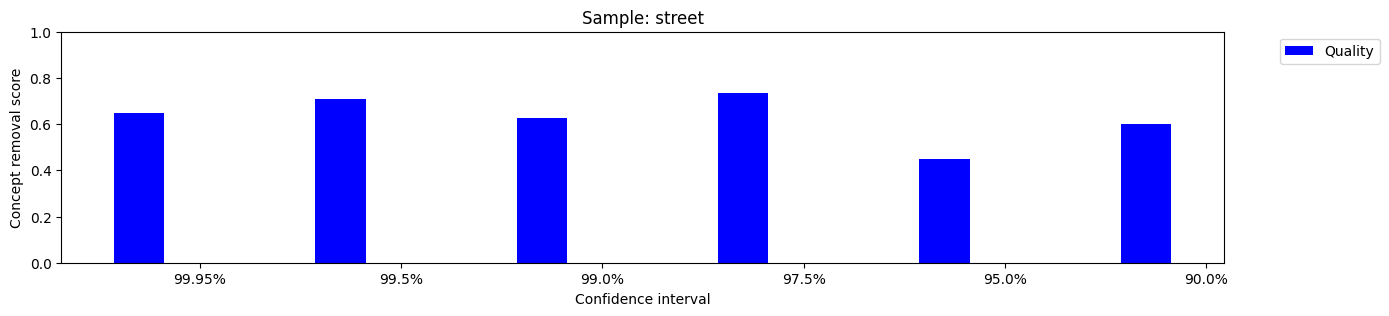

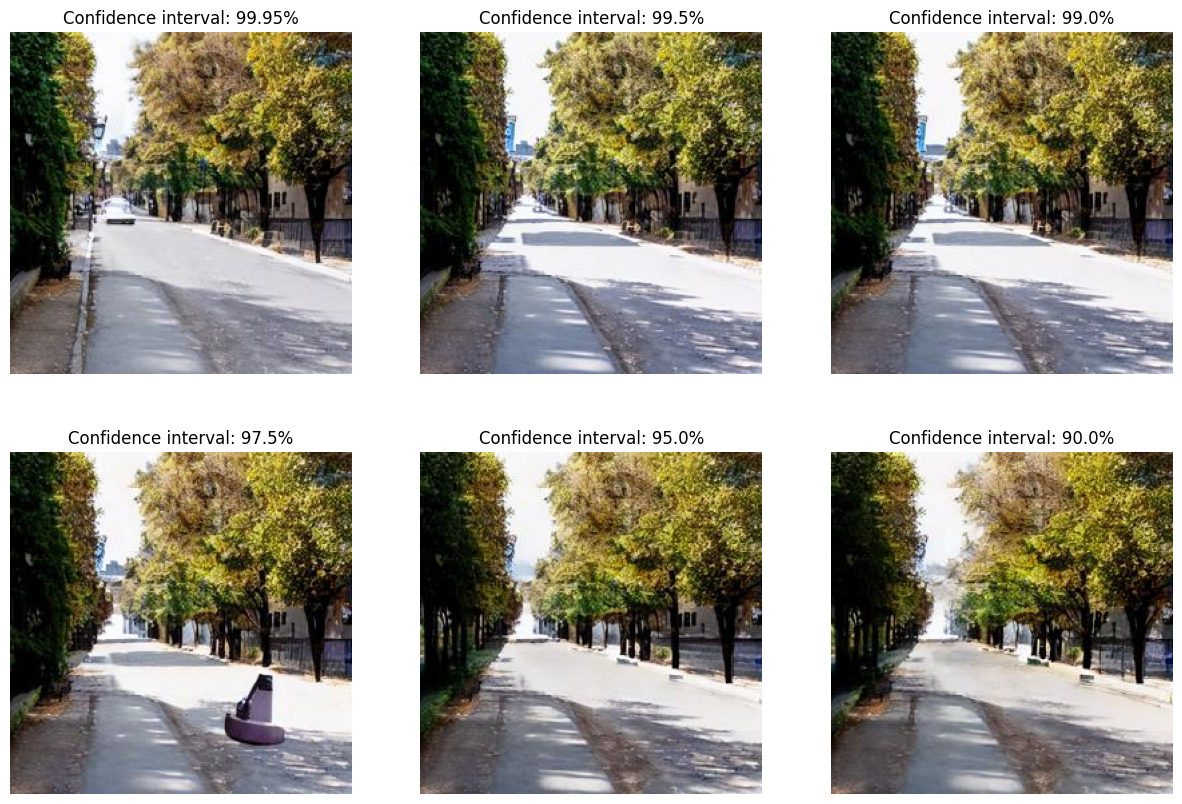

In [70]:
# For a sample, plot the quality and similarity for each confidence interval in a bar plot
print([(1 - conf/2)*100 for conf in conf_int])
# for i in range(dof):
i = 5
fig = plt.figure(figsize=(15, 3))
quality = []
similarity = []
for conf in conf_int:
    quality.append(scores[conf]['concept_removal']['quality'][str(i)])
    # similarity.append(scores[conf]['concept_removal']['concept_sim'][str(i)])
plt.bar(np.arange(len(conf_int)), quality, color='blue', width = bar_width, label='Quality')
# plt.bar(np.arange(len(conf_int)) , similarity, color='red', width = bar_width, label='Similarity')
plt.title(f'Sample: {objects[i]}')
plt.xlabel('Confidence interval')
plt.xticks(np.arange(len(conf_int)) + 0.3, [str((1 - conf/2)*100) + '%' for conf in conf_int])
plt.ylabel('Concept removal score')

plt.ylim(0, 1)
plt.legend(bbox_to_anchor =(1.14, 1.0))
# plt.tight_layout()
plt.show()

# make a 2 x 3 grid of images such that each row corresponds to a confidence interval
images = []
for conf in conf_int:
    image_name = os.path.join(root, f'dof_{dof}_conf_{conf}', 'remove_neurons', f'img_{i}_adj.jpg')
    image = plt.imread(image_name)
    images.append(image)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(f'Confidence interval: {(1 - conf_int[i]/2)*100}%')

plt.show()


